### Given a dataset of internet packet measurements. Classify these packets into UDP or TCP packet on the basis of their size and port number.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz
import pydotplus 

### Read the file into a Pandas dataframe. Give relevant column names.

In [2]:
data = pd.read_csv('traceDMA.txt', sep=" ", header=None)
data.columns = ["PORT", "SIZE", "CLASS"]
data.head(5)

,PORT,SIZE,CLASS
0,139,1460,tcp
1,20,1448,tcp
2,1098,1460,tcp
3,139,0,tcp
4,27960,27,udp


In [3]:
len(data)

10000

### Get the data with class as "TCP"

In [4]:
tcp_data = data[data['CLASS'] == 'tcp' ]
len(tcp_data)

7807

### Get the data with class as "UDP"

In [5]:
udp_data = data[data['CLASS'] == 'udp']
len(udp_data)

2193

## Scatter plot for data with tcp and udp class
### Linear Scale

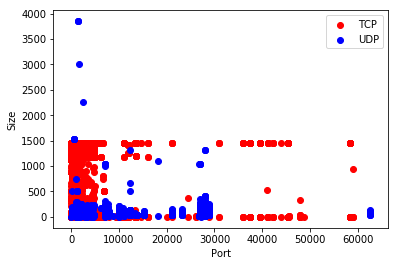

In [6]:
%matplotlib inline
plt.scatter(tcp_data['PORT'], tcp_data['SIZE'], c = 'r', label = 'TCP')
plt.scatter(udp_data['PORT'], udp_data['SIZE'], c = 'b', label = 'UDP')
plt.xlabel('Port')
plt.ylabel('Size')
plt.legend()

### Plot with logarithmic x-axis 

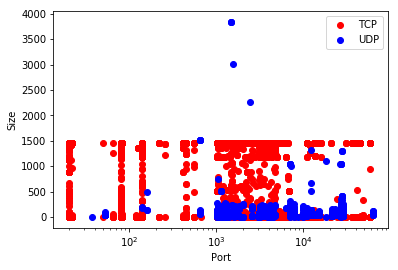

In [7]:
plt.scatter(tcp_data['PORT'], tcp_data['SIZE'], c = 'r', label = 'TCP')
plt.scatter(udp_data['PORT'], udp_data['SIZE'], c = 'b', label = 'UDP')
plt.xlabel('Port')
plt.ylabel('Size')
plt.xscale('log')
plt.legend()

### Plot with logarithmic y-axis 

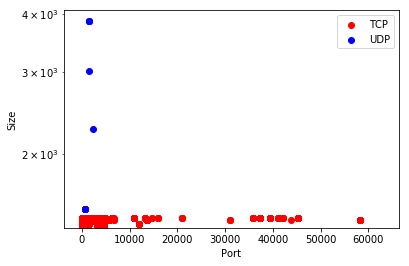

In [8]:
plt.scatter(tcp_data['PORT'], tcp_data['SIZE'], c = 'r', label = 'TCP')
plt.scatter(udp_data['PORT'], udp_data['SIZE'], c = 'b', label = 'UDP')
plt.xlabel('Port')
plt.ylabel('Size')
plt.yscale('log')
plt.legend()

### Plot with logarithmic x and y axis

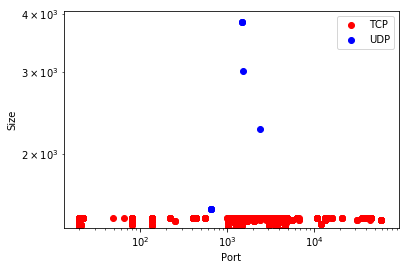

In [9]:
plt.scatter(tcp_data['PORT'], tcp_data['SIZE'], c = 'r', label = 'TCP')
plt.scatter(udp_data['PORT'], udp_data['SIZE'], c = 'b', label = 'UDP')
plt.xlabel('Port')
plt.ylabel('Size')
plt.xscale('log')
plt.yscale('log')
plt.legend()

### Discuss about the possible split points 

Create a decision tree for predicting CLASS from PORT and SIZE. Use a score function covered in class, i.e.,
information gain, Gini index, or CART. You may create your own code or use a package, e.g., rpart in R
* Select your own values for purity and size thresholds, and comment on or justify your choice
* If you create code, include it in your report and cite any sources (e.g. webpages) of code or code snippets
you used. Indicate where the thresholds are specified.
* If you use a package, include your function calls in your report, indicating how the score function and size
and purity thresholds are specified. If you use default values, determine these and include in your report.
* Comment on similarties or differences between these computed results and your choices in item 1 ab

Your report must include the annotated scatter plot (item 1), your code or function calls with parameter details (item
2), and a representation (listed and/or graphical) of the decision tree, e.g., created using tools from a package

In [10]:
clf = tree.DecisionTreeClassifier()
clf.fit(data[['PORT', 'SIZE']], data['CLASS'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
clf.tree_

In [20]:
dotfile = open(r"C:\Users\A-chadha\Desktop\Anjali\Fall 2017\DM\data-mining-scripts\dtree2.dot", 'w')
dot_data1 = tree.export_graphviz(clf, out_file=None)

In [24]:
graph = pydotplus.graph_from_dot_data(dot_data1)
graph.s

AttributeError: 'Dot' object has no attribute 'source'

In [13]:
graph = graphviz.Source(dot_data) 
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH